In [217]:
#Company_Data

In [218]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 500
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import r2_score, classification_report
%matplotlib inline

In [219]:
#Read The Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [220]:
df2 = df.drop(columns=['ShelveLoc','Urban','US'])
df2

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14
396,6.14,139,23,3,37,120,55,11
397,7.41,162,26,12,368,159,40,18
398,5.94,100,79,7,284,95,50,12


In [221]:
#Model Building
x = df2.iloc[:,:-1]
y = df2['Population']

In [222]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [223]:
rf = RandomForestRegressor()
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

In [224]:
ypred

array([285.26, 182.17,  64.81, 218.37, 122.96, 424.24, 333.57, 105.16,
       228.28, 411.41, 357.69, 505.51, 426.47, 131.74, 499.91,  70.18,
       188.63, 503.24, 140.17, 276.42,  43.04, 199.68, 315.73,  50.05,
       248.18,  94.14, 445.98, 140.1 , 183.83, 466.39, 237.17, 338.65,
        97.41, 207.76,  43.31, 353.26, 186.94,  58.03, 366.93, 311.4 ,
        69.81, 236.18, 412.06, 143.7 , 457.01, 301.81, 327.  ,  12.78,
       334.  , 130.9 , 199.42, 411.02, 402.9 , 407.86, 160.81, 427.95,
        13.41, 504.56, 247.78, 265.01, 106.08, 150.65, 288.6 , 265.31,
        79.43, 174.95, 217.48, 421.8 , 284.95, 333.84, 153.1 , 237.21,
       265.35, 237.31, 504.32, 162.16, 402.32, 434.98, 235.08, 464.64,
        69.73, 289.27, 497.23,  28.19, 490.  , 357.76, 496.46, 219.25,
        51.81, 190.6 , 370.29, 303.03, 109.03, 163.87,  80.37, 157.89,
       325.78, 447.46, 399.94, 206.13])

In [225]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [226]:
print(f"R2value:{r2_score(ytest,ypred)}")
print(f"MSE:{mean_squared_error(ytest,ypred)}")
print(f"RMSE:{np.sqrt(mean_squared_error(ytest,ypred))}")

R2value:0.999857870998477
MSE:2.827609000000006
RMSE:1.681549582973992


In [227]:
#Plotting Regressor

len(rf.estimators_)

100

In [228]:
rf.estimators_[99]

DecisionTreeRegressor(max_features=1.0, random_state=1887116699)

In [229]:
from sklearn import tree

[Text(0.5, 0.875, 'Population <= 252.5\nsquared_error = 20338.405\nsamples = 183\nvalue = 258.43'),
 Text(0.25, 0.625, 'Population <= 117.0\nsquared_error = 4803.019\nsamples = 82\nvalue = 128.49'),
 Text(0.125, 0.375, 'Population <= 46.0\nsquared_error = 953.942\nsamples = 36\nvalue = 55.055'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Population <= 189.5\nsquared_error = 1731.737\nsamples = 46\nvalue = 174.386'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'Population <= 382.5\nsquared_error = 5102.03\nsamples = 101\nvalue = 376.783'),
 Text(0.625, 0.375, 'Population <= 312.5\nsquared_error = 1302.056\nsamples = 49\nvalue = 320.271'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'Population <= 440.0\nsquared_error = 1366.667\nsamples = 52\nvalue = 443.5'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (..

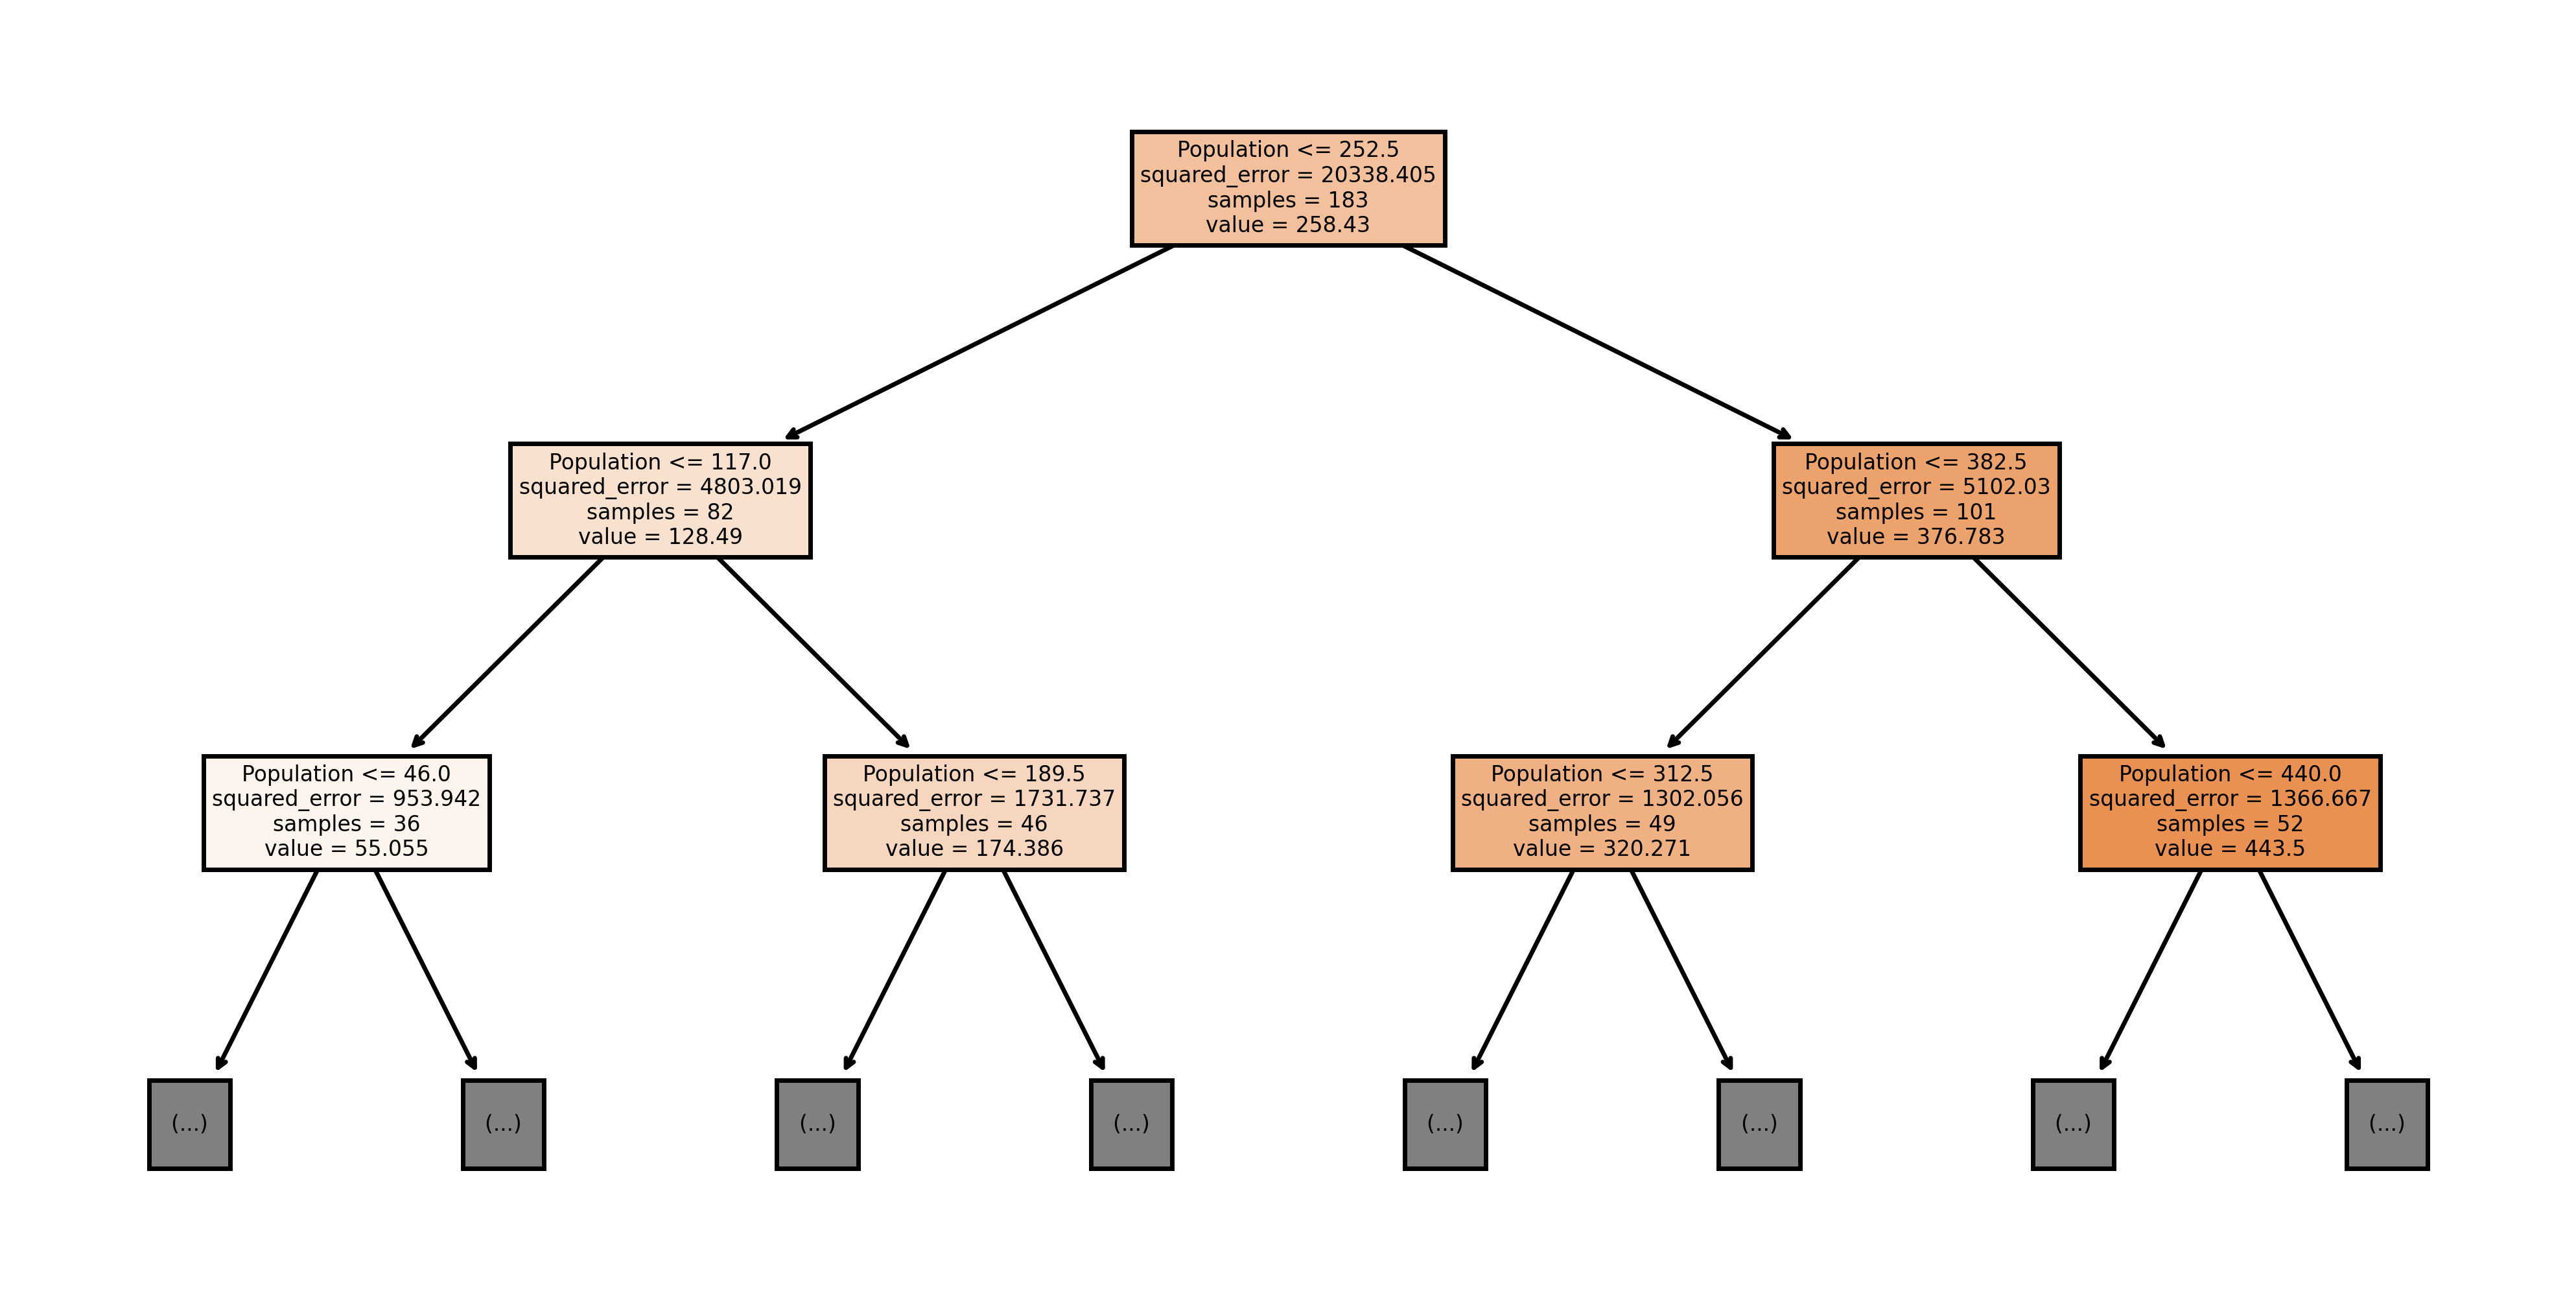

In [230]:
tree.plot_tree(rf.estimators_[1],feature_names=x.columns,filled=True,max_depth=2)

In [231]:
#Classification

In [232]:
#Read The Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [233]:
df3 = df.drop(columns=['ShelveLoc','Urban','US'])
df3

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,9.50,138,73,11,276,120,42,17
1,11.22,111,48,16,260,83,65,10
2,10.06,113,35,10,269,80,59,12
3,7.40,117,100,4,466,97,55,14
4,4.15,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14
396,6.14,139,23,3,37,120,55,11
397,7.41,162,26,12,368,159,40,18
398,5.94,100,79,7,284,95,50,12


<Axes: xlabel='Price', ylabel='count'>

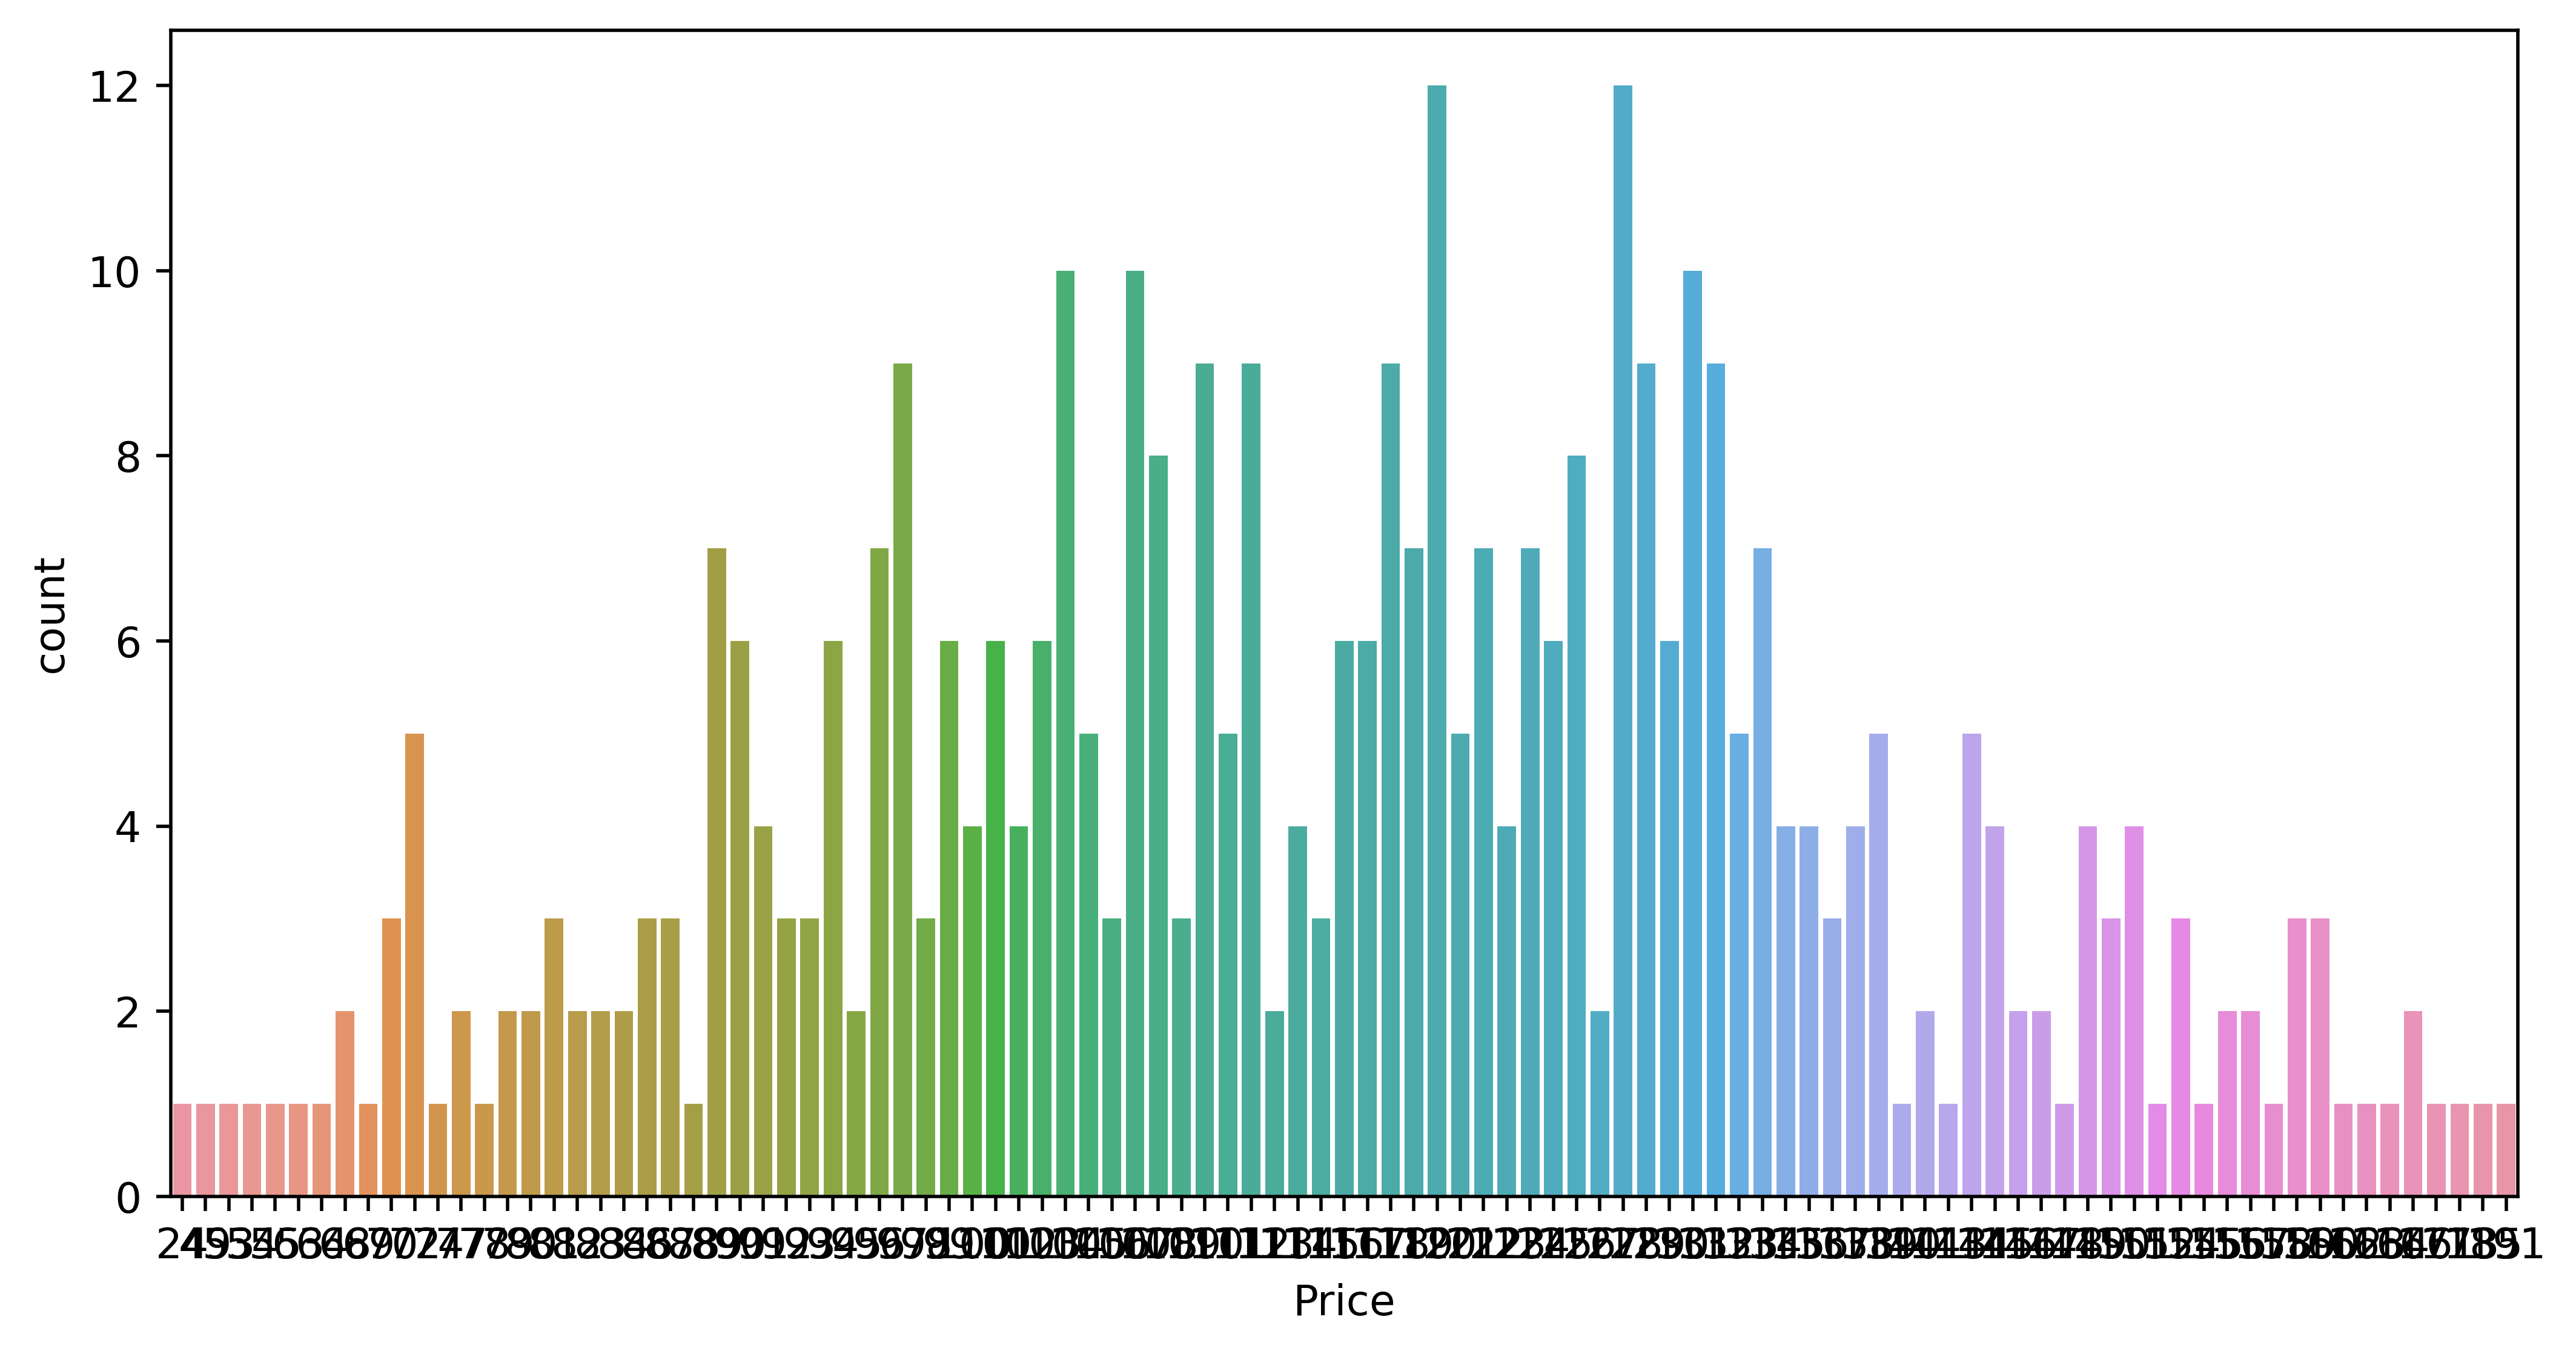

In [234]:
sns.countplot(x=df3['Price'])

In [235]:
df3['Price'].value_counts()

120    12
128    12
107    10
104    10
131    10
       ..
49      1
155     1
24      1
148     1
78      1
Name: Price, Length: 101, dtype: int64

In [236]:
df3['Price']

0      120
1       83
2       80
3       97
4      128
      ... 
395    128
396    120
397    159
398     95
399    120
Name: Price, Length: 400, dtype: int64

In [237]:
x = df3.iloc[:,:-1]
y = df3['Price']

In [238]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=1)

In [239]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [240]:
ypred = rfc.predict(xtest)
ypred

array([ 95,  72, 111, 126, 104, 118, 131,  86, 104, 104, 133,  99,  90,
       152, 112, 101, 126, 105, 144, 128, 108, 135, 122, 107, 134, 125,
       129, 135, 104,  97, 128, 128, 159, 131, 108,  97, 104,  97, 131,
       104, 106, 121,  70, 144, 132, 112, 107, 120, 129, 155, 122,  93,
        53,  53, 122, 112,  86, 119,  90, 114, 108, 116, 128, 104, 133,
       151, 137, 156, 100, 131, 120, 133,  97, 112,  91, 107, 124, 156,
       134, 138])

In [241]:
#Evaluate Model
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

          49       0.00      0.00      0.00         1
          53       0.00      0.00      0.00         0
          55       0.00      0.00      0.00         1
          63       0.00      0.00      0.00         1
          68       0.00      0.00      0.00         1
          70       0.00      0.00      0.00         0
          72       0.00      0.00      0.00         2
          79       0.00      0.00      0.00         1
          81       0.00      0.00      0.00         1
          82       0.00      0.00      0.00         1
          86       0.00      0.00      0.00         0
          89       0.00      0.00      0.00         2
          90       0.50      0.50      0.50         2
          91       0.00      0.00      0.00         1
          93       0.00      0.00      0.00         0
          94       0.00      0.00      0.00         2
          95       1.00      1.00      1.00         1
          96       0.00    

In [242]:
rfc.score(xtrain,ytrain),rfc.score(xtest,ytest)

(1.0, 0.3375)